## Python Libraries Used Within Workbook

In [68]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import scipy.linalg as la
import scipy.stats as st
import math
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Project Focus:
Fit a regression line to the provided data to estimate and predict abalone age based on non-destructive physical attributes. 
<br>
Provide reasoning for multivariate techniques as well as assumptions on what makes them valid to use.

## Credentials

Data comes from an original study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)
    
Original owners of data:
    
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

## Cleaning Data

Attribute information:
The attributes have been scaled by 1/200 for their previous applications in ANN (artifical neural networks).

| Variable  | Data Type | Units | Description |
| :--- | :--- | :--- | :--- |
| Sex | Ordinal |	M, F, I | M = male, F = female, I = infant |
| Length | Continuous |	mm | longest shell measurement |
| Diameter | Continuous | mm | perpendicular to length |
| Height | Continuous | mm | with meat in shell |
| Whole weight | Continuous | grams | whole abalone |
| Shucked weight | Continuous | grams |weight of meat |
| Viscera weight | Continuous | grams | gut weight (after bleeding) |
| Shell weight | Continuous | grams | after being dried |
| Rings | Integer | | +1.5 gives the age in years |

   



In [3]:
# Import the .data file into a dataframe with column headers listed below.
Aba_data = pd.read_csv("abalone.data", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Ring Count'])

# Next step is to seperate the male, female, and infant abalone data to minimize confounding factors. 
# Invoking the "df.loc" method to return the seperated abalone data based on sex to their new corresponding dataframes.  
Aba_data_male = Aba_data.loc[Aba_data['Sex'] == 'M']
Aba_data_female = Aba_data.loc[Aba_data['Sex'] == 'F']  
Aba_data_inf = Aba_data.loc[Aba_data['Sex'] == 'I']

# Dropping the "Sex" column within their respective dataframes to reduce redundant information.
Aba_data_male = Aba_data_male.drop(['Sex'], axis = 1)
Aba_data_female = Aba_data_female.drop(['Sex'], axis = 1)
Aba_data_inf = Aba_data_inf.drop(['Sex'], axis = 1)

# Resetting index starting at 0 enumerating until the last data point within respective dataframes making sure to not include the old segmented indices.
Aba_data_male = Aba_data_male.reset_index(drop = True)
Aba_data_female = Aba_data_female.reset_index(drop = True)
Aba_data_inf = Aba_data_inf.reset_index(drop = True)

# Non-destructive measurements are length, height, diameter, and weight. Removing the shucked, viscera, and shell weight data.
# Keeping the ring count as response variable.
Aba_data_male = Aba_data_male.drop(['Shucked Weight', 'Viscera Weight', 'Shell Weight'], axis = 1)
Aba_data_female = Aba_data_female.drop(['Shucked Weight', 'Viscera Weight', 'Shell Weight'], axis = 1)
Aba_data_inf = Aba_data_inf.drop(['Shucked Weight', 'Viscera Weight', 'Shell Weight'], axis = 1)

pred_col = ['Length', 'Diameter', 'Height', 'Whole Weight']

# Scaling up by 200 to restore the original values.
for col in pred_col:
    Aba_data_male[col] = Aba_data_male[col] * 200
    Aba_data_female[col] = Aba_data_female[col] * 200
    Aba_data_inf[col] = Aba_data_inf[col] * 200
    
display(Aba_data_male, Aba_data_female, Aba_data_inf)

,Length,Diameter,Height,Whole Weight,Ring Count
0,91.0,73.0,19.0,102.8,15
1,70.0,53.0,18.0,45.1,7
2,88.0,73.0,25.0,103.2,10
3,95.0,74.0,25.0,101.9,9
4,86.0,70.0,22.0,81.2,10
...,...,...,...,...,...
1523,110.0,86.0,26.0,167.9,10
1524,112.0,86.0,31.0,173.5,8
1525,118.0,88.0,27.0,193.2,10
1526,120.0,95.0,41.0,235.2,9


,Length,Diameter,Height,Whole Weight,Ring Count
0,106.0,84.0,27.0,135.4,9
1,106.0,83.0,30.0,155.5,20
2,109.0,85.0,25.0,153.6,16
3,110.0,88.0,30.0,178.9,19
4,105.0,76.0,28.0,121.3,14
...,...,...,...,...,...
1302,117.0,95.0,33.0,210.6,11
1303,117.0,91.0,34.0,198.9,11
1304,103.0,80.0,25.0,123.0,8
1305,113.0,90.0,33.0,177.4,11


,Length,Diameter,Height,Whole Weight,Ring Count
0,66.0,51.0,16.0,41.0,7
1,85.0,60.0,19.0,70.3,8
2,71.0,56.0,17.0,58.1,7
3,76.0,55.0,20.0,45.1,10
4,48.0,35.0,9.0,14.0,5
...,...,...,...,...,...
1337,96.0,71.0,22.0,89.9,8
1338,78.0,62.0,17.0,68.8,7
1339,78.0,58.0,20.0,56.9,7
1340,81.0,60.0,17.0,60.7,7


## Descriptive Statistics for Length, Diameter, Height, Whole Weight, and Ring Count

Calculate sample mean, sample variance, interquartile range, and correlation coefficient for physical attribute variables.

#### Sample Mean for Length, Diameter, Height, Whole Weight, and Ring Count.

In [4]:
# Incredibly easy method to invoke is the "df.mean()".
# Returns the mean of each column as a Panda Series.
Aba_data_male_mean = Aba_data_male.mean(axis = 0)
Aba_data_female_mean = Aba_data_female.mean(axis = 0)
Aba_data_inf_mean = Aba_data_inf.mean(axis = 0)

display(Aba_data_male_mean, Aba_data_female_mean, Aba_data_inf_mean) 


Length          112.278141
Diameter         87.857330
Height           30.276178
Whole Weight    198.291885
Ring Count       10.705497
dtype: float64

Length          115.818669
Diameter         90.946442
Height           31.602142
Whole Weight    209.306427
Ring Count       11.129304
dtype: float64

Length          85.549180
Diameter        65.298808
Height          21.599106
Whole Weight    86.272504
Ring Count       7.890462
dtype: float64

#### Sample standard deviation for Length, Diameter, Height, Whole Weight, and Ring Count.

In [5]:
# Using a similar method but for standard deviation, "df.std()".
Aba_data_male_std = Aba_data_male.std(axis = 0)
Aba_data_female_std = Aba_data_female.std(axis = 0)
Aba_data_inf_std = Aba_data_inf.std(axis = 0)

display(Aba_data_male_std, Aba_data_female_std, Aba_data_inf_std) 

Length          20.539463
Diameter        16.879613
Height           6.960900
Whole Weight    94.116275
Ring Count       3.026349
dtype: float64

Length          17.231911
Diameter        14.190841
Height           7.996798
Whole Weight    86.063263
Ring Count       3.104256
dtype: float64

Length          21.771545
Diameter        17.621786
Height           6.399007
Whole Weight    57.254932
Ring Count       2.511554
dtype: float64

#### Sample variance for Length, Diameter, Height, Whole Weight, and Ring Count.

In [6]:
# I already have the standard deviation for each variable, squaring them will provide me with the sample variances as well.
# I'm invoking the numpy power method that passes in a series or list and raises all the entries to the second power.
Aba_data_male_var = np.power(Aba_data_male_std, 2)
Aba_data_female_var = np.power(Aba_data_female_std, 2)
Aba_data_inf_var = np.power(Aba_data_inf_std, 2)

display(Aba_data_male_var, Aba_data_female_var, Aba_data_inf_var )

Length           421.869542
Diameter         284.921348
Height            48.454128
Whole Weight    8857.873163
Ring Count         9.158791
dtype: float64

Length           296.938763
Diameter         201.379978
Height            63.948786
Whole Weight    7406.885165
Ring Count         9.636407
dtype: float64

Length           474.000189
Diameter         310.527351
Height            40.947292
Whole Weight    3278.127290
Ring Count         6.307903
dtype: float64

#### First Quartile, Median (Second Quartile), Third Quartile, and Interquartile Range with Outliers.

In [7]:
# There are a few ways to calculate the quartiles, but I'm going to use a method that inputs a percentile.
# Reminder that the first quartile is the 25th percentile; similarly for the second and third corresponds to the 50th and 75th percentile.
q1_male = np.percentile(Aba_data_male['Length'], q = 50, axis = 0, interpolation = 'midpoint')

# Here I'm creating a summary table for the quartiles, interquartile range, minimum (Q1-1.5*IQR), maximum (Q3+1.5*IQR).
qrt_male = pd.DataFrame(index = ['Q1', 'Q2', 'Q3', 'IQR',  'Minimum', 'Maximum'], columns = Aba_data_male.columns)
qrt_female = pd.DataFrame(index = ['Q1', 'Q2', 'Q3', 'IQR', 'Minimum', 'Maximum'], columns = Aba_data_male.columns)
qrt_inf = pd.DataFrame(index = ['Q1', 'Q2', 'Q3', 'IQR', 'Minimum', 'Maximum'], columns = Aba_data_male.columns)


# Extracting header from the male abalone data column headers that can be used for quartile summary algorithm.
var_list = list(Aba_data_male.columns)

# Percentile values list.
pct_list = [('Q1', 25), ('Q2', 50), ('Q3', 75), ('Minimum', 0), ('Maximum', 100)]

# Looping through the columns of each abalone dataframe computing the Q1, Q2, Q3, Minimum, and Maximum.
# I'm defining the Min, Max as the 0th percentile and 100th percentile.
for var in var_list:
    for qrt, pct in pct_list:
       
        qrt_male_val = np.percentile(Aba_data_male[var], q = int(pct), axis = 0, interpolation = 'midpoint')
        qrt_male.loc[qrt, var] = qrt_male_val
        
        qrt_female_val = np.percentile(Aba_data_female[var], q = int(pct), axis = 0, interpolation = 'midpoint')
        qrt_female.loc[qrt, var] = qrt_female_val
        
        qrt_inf_val = np.percentile(Aba_data_inf[var], q = int(pct), axis = 0, interpolation = 'midpoint')
        qrt_inf.loc[qrt, var] = qrt_inf_val     

# Computing interquartile range. 
for var in var_list:
    qrt_male.loc['IQR', var] = qrt_male.loc['Q3', var] - qrt_male.loc['Q1', var]
    qrt_female.loc['IQR', var] = qrt_female.loc['Q3', var] - qrt_female.loc['Q1', var]
    qrt_inf.loc['IQR', var] = qrt_inf.loc['Q3', var] - qrt_inf.loc['Q1', var]

display(qrt_male, qrt_female, qrt_inf,)

,Length,Diameter,Height,Whole Weight,Ring Count
Q1,101,79,26,134.15,9
Q2,116,91,31,195.15,10
Q3,126,100,35,253.15,12
IQR,25,21,9,119,3
Minimum,31,22,5,3.1,3
Maximum,156,126,103,565.1,27


,Length,Diameter,Height,Whole Weight,Ring Count
Q1,105,82,28,146,9
Q2,118,93,32,207.7,10
Q3,128,101,35,264.05,12
IQR,23,19,7,118.05,3
Minimum,55,39,3,16,5
Maximum,163,130,226,531.4,29


,Length,Diameter,Height,Whole Weight,Ring Count
Q1,72,54,17,41.1,6
Q2,87,67,22,76.8,8
Q3,102,78,26,119.85,9
IQR,30,24,9,78.75,3
Minimum,15,11,0,0.4,1
Maximum,145,110,44,409.9,21


#### Male Abalone Physical Attributes Boxplots

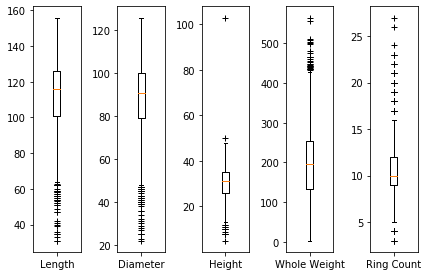

In [8]:
# Place 5 plots for each variable. 
fig, axs = plt.subplots(1, 5)

#fig = plt.figure(figsize = (6, 3))

# Improve spacing of boxplots using the method below.
fig.tight_layout()

# Converting columns within the male abalone data to list.
len_male = Aba_data_male['Length'].tolist()
dia_male = Aba_data_male['Diameter'].tolist()
ht_male = Aba_data_male['Height'].tolist()
wt_male = Aba_data_male['Whole Weight'].tolist()
ring_male = Aba_data_male['Ring Count'].tolist()

axs[0].boxplot(len_male, 0, 'k+', showfliers = True, labels = ['Length'])
axs[1].boxplot(dia_male, 0, 'k+', showfliers = True, labels = ['Diameter'])
axs[2].boxplot(ht_male, 0, 'k+', showfliers = True, labels = ['Height'])
axs[3].boxplot(wt_male, 0, 'k+', showfliers = True, labels = ['Whole Weight'])
axs[4].boxplot(ring_male, 0, 'k+', showfliers = True, labels = ['Ring Count'])
plt.show()

#### Female Abalone Physical Attributes Boxplots

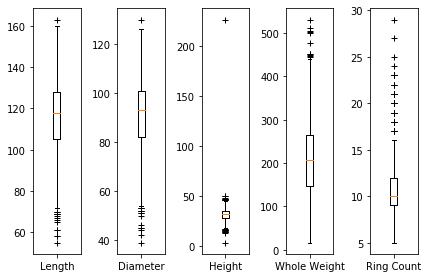

In [9]:
# Place 5 plots for each variable. 
fig, axs = plt.subplots(1, 5)

# Improve spacing of boxplots using the method below.
fig.tight_layout()

# Converting columns within the female abalone data to list.
len_female = Aba_data_female['Length'].tolist()
dia_female = Aba_data_female['Diameter'].tolist()
ht_female = Aba_data_female['Height'].tolist()
wt_female = Aba_data_female['Whole Weight'].tolist()
ring_female = Aba_data_female['Ring Count'].tolist()

axs[0].boxplot(len_female, 0, 'k+', showfliers = True, labels = ['Length'])
axs[1].boxplot(dia_female, 0, 'k+', showfliers = True, labels = ['Diameter'])
axs[2].boxplot(ht_female, 0, 'k+', showfliers = True, labels = ['Height'])
axs[3].boxplot(wt_female, 0, 'k+', showfliers = True, labels = ['Whole Weight'])
axs[4].boxplot(ring_female, 0, 'k+', showfliers = True, labels = ['Ring Count'])

plt.show()

#### Infant Abalone Physical Attributes Boxplots

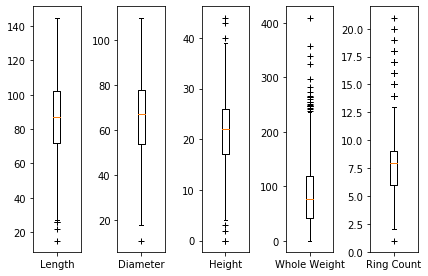

In [10]:
# Place 5 plots for each variable. 
fig, axs = plt.subplots(1, 5)

# Improve spacing of boxplots using the method below.
fig.tight_layout()

# Converting columns within the infant abalone data to list.
len_inf = Aba_data_inf['Length'].tolist()
dia_inf = Aba_data_inf['Diameter'].tolist()
ht_inf = Aba_data_inf['Height'].tolist()
wt_inf = Aba_data_inf['Whole Weight'].tolist()
ring_inf = Aba_data_inf['Ring Count'].tolist()

axs[0].boxplot(len_inf, 0,'k+', showfliers = True, labels = ['Length'])
axs[1].boxplot(dia_inf, 0,'k+', showfliers = True, labels = ['Diameter'])
axs[2].boxplot(ht_inf, 0,'k+', showfliers = True, labels = ['Height'])
axs[3].boxplot(wt_inf, 0,'k+', showfliers = True, labels = ['Whole Weight'])
axs[4].boxplot(ring_inf, 0,'k+', showfliers = True, labels = ['Ring Count'])

plt.show()

Inspecting the 5 number summary table and boxplots for infant abalone, the ring count stands out as odd. According to the 128th fisheries report published in 2001 by the Australian Department of Fisheries, black lip abalone has a maturation age of 3 years. The ring count boxplot for the infant data shows spread from 1 to over 20 rings with half of the data between 6 to 9 rings. The abalone age is add 1.5 to the number of rings. Working backwards here starting with age to ring count, a mature black lip abalone is 1.5 rings. Destructive methods and an additional study would need to be undertaken to estimate age on width between rings, so I will conservatively round down on ring count making an infant black lip abalone having less than 2 rings.

<br>
Using the biology of the abalone as justification, I will discard observations within the infant dataframe with less than 2 rings.

In [11]:
display(Aba_data_inf[Aba_data_inf['Ring Count'] < 2])

,Length,Diameter,Height,Whole Weight,Ring Count
39,15.0,11.0,2.0,0.4,1


The returned dataframe for infant abalone with a conditional operator for less than 2 ring count contains a singular entry. There is something suspicious about this data set or my understanding of the "infant" designation is flawed. I will rely on the biology as a foundation for decision making in this case and not use the infant data set because there is only one data point.
<br>

I would like to now combine the female and male abalone data into one for a single regression analysis, but is that appropriate to do so? Is there a statistical tool to examine if female abalone are different enough from male abalone in terms of physical features requiring two seperate regressions?
<br>

A test of two population means comes to mind with the assumption of unequal variances to determine if male and female abalone physical features are different from each other. I'll be using a non-pooled t-Test with the assumptions that the abalones were simply randomly selected and that the selection of abalone were free of influence from previous choices. With the practical application of the Central Limit Theorem, and a healthy sample size of one thousand plus, the normal assumption is fulfilled.

#### Non-Pooled t-Test

The null hypothesis: mean male abalone physical feature is equal to that of their female counterpoint.
<br>
The alternative hypothesis: mean male abalone physical feature is not equal to that of their female counterpoint.
<br> 

$\alpha$-level = 5%
<br>

If $p$ $\leq$ $\alpha$, reject null hypothesis.

In [12]:
tt_results = pd.DataFrame(index = var_list, columns = ['t-Statistic', 'p-value'])

for var in var_list:
    t_stat, p_val = st.ttest_ind(Aba_data_male[var], Aba_data_female[var], equal_var = False)
    tt_results.loc[var] = t_stat, p_val

display(tt_results)

,t-Statistic,p-value
Length,-4.9907,6.38015e-07
Diameter,-5.29354,1.29146e-07
Height,-4.66939,3.17388e-06
Whole Weight,-3.25309,0.00115504
Ring Count,-3.66566,0.000251381


The table summarizes the t-Statistic, and p-values for the physical features. The returned p-values say to reject the null hypothesis for all features; simply said, female abalone differ in size and age from males. Looking at the mean summary values between male and female abalone, the female abalone are, on average, larger than their male counterparts.
<br>

With the information provided so far, I will run a regression on male and female abalone seperately with a third regression on a combined data set for comparison.

#### Variable Correlation by Sex

Plotting a matrix of scatterplots exhibits the general relationship predictor variables have with one another. The histograms are inserted into the diagonal entries of the matrix of graphs to replace unimportant information.

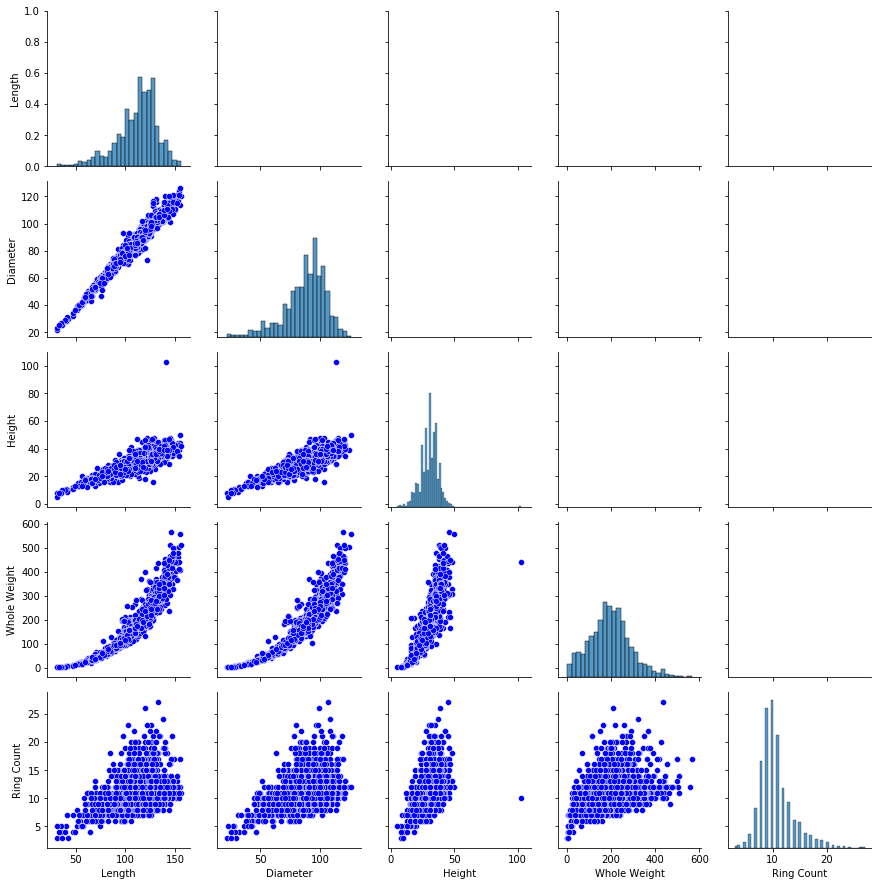

In [13]:
# PairGrid method is used to quickly assess relationships among the variables by way of scatter and kernel density estimate plots.
pgs_male = sns.PairGrid(Aba_data_male)
pgs_male.map_diag(sns.histplot)
pgs_male.map_lower(sns.scatterplot, color = 'blue')
#pgs_male.map_upper(sns.kdeplot, color = 'blue')
plt.show()

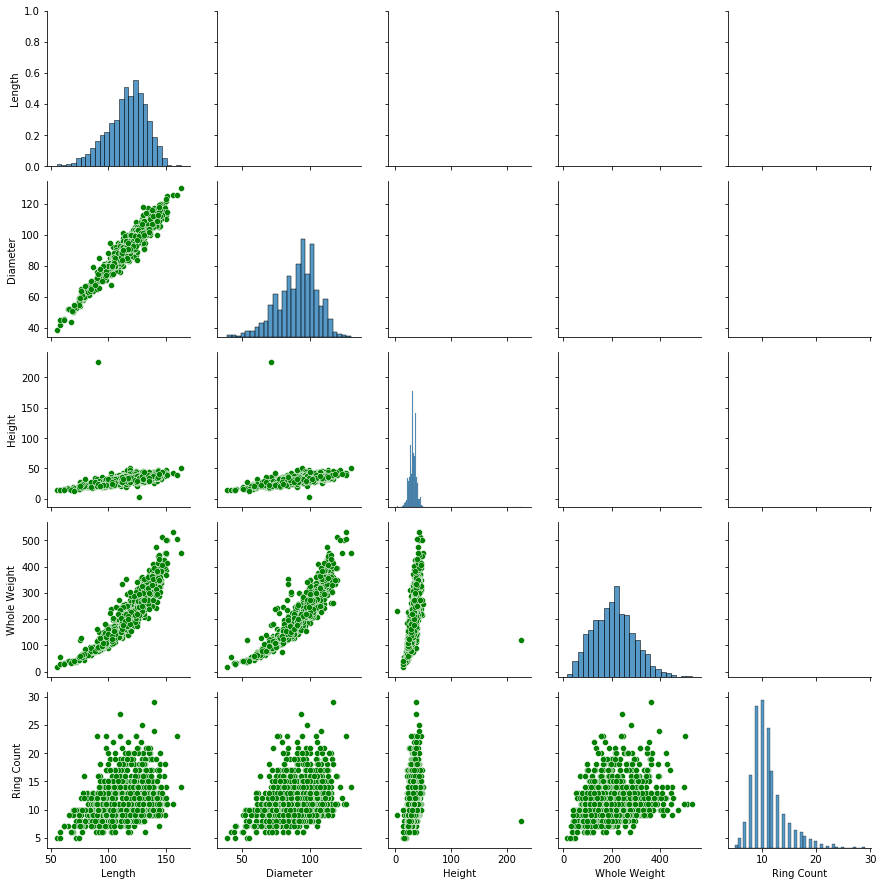

In [14]:
pgs_female = sns.PairGrid(Aba_data_female)
pgs_female.map_diag(sns.histplot)
pgs_female.map_lower(sns.scatterplot, color = 'green')
#pgs_female.map_upper(sns.kdeplot, color = 'green')
plt.show()

The matrix of scatter plot shows there a single observation for both the male and female ablone for ring count compared to height that stands out. This observation will need further assessment regarding its impact on the regression.

#### Correlation Coefficient Matrix and Heatmap

An entire data column like length and diameter can be considered their own vectors in space. Correlation in vector space is the measure of the cosined angle between the two vectors. It is a number that describles how strongly the two vectors follow a linear relationship. The correlation coefficient vary from -1 to +1. Two vectors pointing in the same direction parallel is the +1 case while the -1 case corresponds to two vectors parallel, but directionally opposed. 
<br>

An intuitive way to think about correlation between two vectors is if I change 1 unit of let say, the length vector, how much does the diameter change? If its a 1 to 1 change, then the vectors have perfect correlation of 1. If its a 1 to -1 change, then the vectors have perfect correlation of -1. If there is no change, then they are uncorrelated.
<br>

The heatmaps annotated with the correlation coefficient $r$ shows the strength of linear relationships among the predictor variables by number and depth of color.

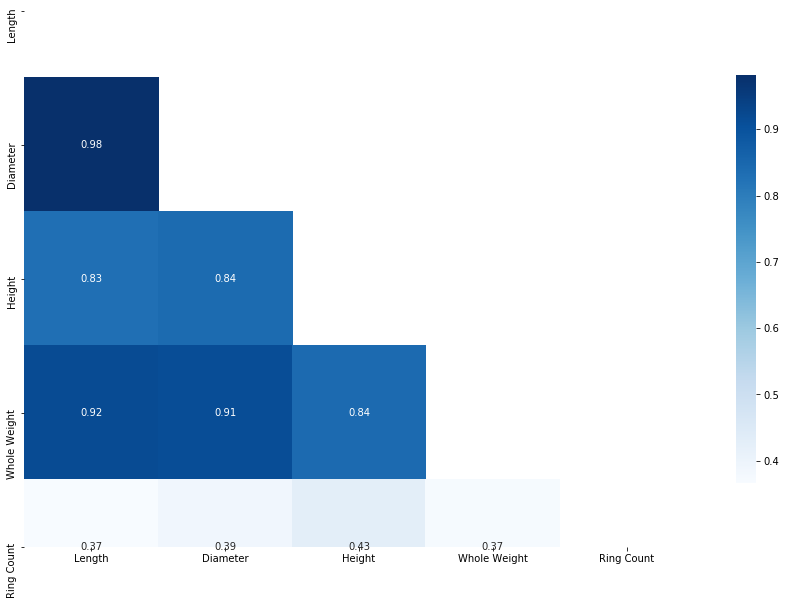

In [15]:
# Produce heatmap and numerical correlation value, r.
corr_male = Aba_data_male.corr()
mask_male = np.triu(np.ones_like(corr_male, dtype = bool))

# Sizing the heatmap plots.
f, ax = plt.subplots(figsize = (15, 15))
cmap = sns.diverging_palette(250, 15, as_cmap=True)

sns.heatmap(corr_male, mask = mask_male, cmap = 'Blues', square = True, annot = True, cbar_kws = {"shrink": .5})
plt.show()

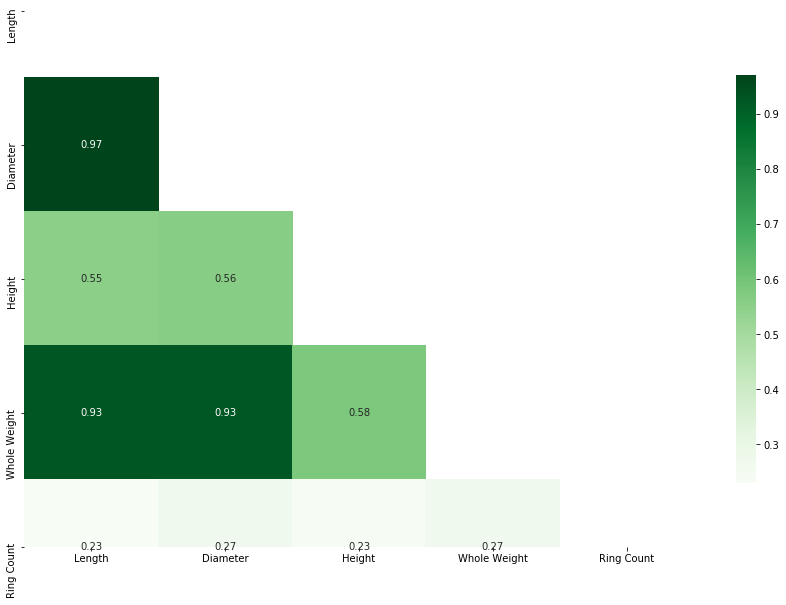

In [16]:
corr_female = Aba_data_female.corr()
mask_female = np.triu(np.ones_like(corr_male, dtype = bool))

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(250, 15, as_cmap=True)

sns.heatmap(corr_female, mask = mask_female, cmap = 'Greens', square = True, annot = True, cbar_kws = {"shrink": .5})
plt.show()

## Principal Component Analysis - Ordinary Least Squares Regression

The matrix of scatterplots show tight clustering that can be encapsulated by an football shaped outline (ellipsoid) along with the correlation heatmap matrix indicate multicollinearity among the predictor variables. I will need to determine the Variance Inflated Factors, VIF's for short, that will numerically describe how the independent predictor variables affect one another.
<br>

VIF$_i$ values of less than or equal to 1, VIF$_i$  $\leq 1$, means that the $i^{th}$ predictor variable has little to no multicollinearity with the remaining predictor variables.
<br>

VIF$_i$ values between 1 and 5, $1 <$ VIF$_i$  $\leq 5$, means that the $i^{th}$ predictor variable is moderately multicollineated with the remaining predictor variables.
<br>

VIF$_i$ values greater than 5,  VIF$_i$ $> 5$, means that the $i^{th}$ predictor variable is severely multicollineated with the remaining predictor variables.
<br>

In [17]:
# Create dataframes that are used as matrices to run correlation coefficient calculations.
VIF_mpvar = Aba_data_male[['Length', 'Diameter','Height', 'Whole Weight']]
corr_mres = np.corrcoef(VIF_mpvar, rowvar = False)

# Take the inverse and return the diagonals which give the Coefficient of Determination, r^2.
VIF_male = np.linalg.inv(corr_mres)
VIF_fpvar = Aba_data_female[['Length', 'Diameter','Height', 'Whole Weight']]

corr_fres = np.corrcoef(VIF_fpvar, rowvar = False)
VIF_female = np.linalg.inv(corr_fres)

display(VIF_male.diagonal(), VIF_female.diagonal())

array([30.30347338, 29.52141648,  3.86176641,  7.35796752])

array([19.77714403, 18.95648111,  1.52612151,  8.19794695])

The returned arrays contain the VIF values that indicate length, diameter, and whole weight for both male and female abalone are multicollineated meaning shifts in any of the three could lead to changes in the other. I need to find a method to uncorrelate the predictor variables before running ordinary least squares regression.
<br>

Principal Component Analysis is the solution to the problem. It will untangle the predictor variables, reduce the dimensionality of the data set in terms of numerical entries, and project its vector space to a lower dimension while still retaining the information of the original data. Coupling Principal Component Analysis and Ordinary Least Squares regression, I can estimate the best fit line with fewer inputs. This technique is called Principal Component Regression.

#### Principal Component Analysis

PCA views the original data set as a vector space and collapses the basis vectors that make up the space into perpendicular axes of a higher dimensional ellipsoid. 
Each axes has a corresponding scaling factor (think "tick marks of an axes") that represents a fraction of the total variance (information) within the original data. 
Since the axes are perpendicular to one another, they are uncorrelated, which makes it possible to resolve the multicollinearity issues found within the data set determined visually by the scatter plots, and computationally by the correlation coefficient $r$ and coefficient of determination $r^{2}$.


#### Forming the Covariance Matrix and Standardized Design Matrix.

In [33]:
# Form the covariance matrix by XTX or XXT depending how the data is structured to reduce 1000+ by 4 matrix to a 4 by 4.
pca_male = Aba_data_male[['Length', 'Diameter', 'Height', 'Whole Weight']] 

pca_var = ['Length', 'Diameter', 'Height', 'Whole Weight']

# Standardizing design matrix (original data set) by mean centering and scaling by the respective standard deviations because the units are mixed. Grams for weights and mm for length.
z_mpca = pd.DataFrame(index = Aba_data_male.index, columns = ['Length', 'Diameter', 'Height', 'Whole Weight'])
z_fpca = pd.DataFrame(index = Aba_data_female.index, columns = ['Length', 'Diameter', 'Height', 'Whole Weight'])

for pc in pca_var:
    for i in z_mpca.index:
        z_mpca.loc[i, pc] = (Aba_data_male.loc[i, pc] - Aba_data_male[pc].mean()) / Aba_data_male[pc].std()

for pc in pca_var:
    for i in z_fpca.index:
        z_fpca.loc[i, pc] = (Aba_data_female.loc[i, pc] - Aba_data_female[pc].mean()) / Aba_data_female[pc].std()        

display(z_mpca, z_fpca)

# the method "df.cov()"will input a data matrix, standardize it then compute the covariance matrix by means of X @ X.T or X.T @ X.
cov_m = pca_male.cov()

pca_female = Aba_data_female[['Length', 'Diameter', 'Height', 'Whole Weight']]
cov_f = pca_female.cov()

display(cov_m, cov_f)

,Length,Diameter,Height,Whole Weight
0,-1.03596,-0.880194,-1.61993,-1.01462
1,-2.05839,-2.06505,-1.76359,-1.62769
2,-1.18202,-0.880194,-0.757974,-1.01037
3,-0.841217,-0.820951,-0.757974,-1.02418
4,-1.2794,-1.05792,-1.18895,-1.24412
...,...,...,...,...
1523,-0.110915,-0.110034,-0.614314,-0.322918
1524,-0.0135418,-0.110034,0.103984,-0.263418
1525,0.278579,0.00845222,-0.470654,-0.0541021
1526,0.375952,0.423154,1.54058,0.392154


,Length,Diameter,Height,Whole Weight
0,-0.569796,-0.489502,-0.575498,-0.858745
1,-0.569796,-0.55997,-0.200348,-0.625196
2,-0.3957,-0.419034,-0.825598,-0.647273
3,-0.337668,-0.20763,-0.200348,-0.353303
4,-0.627828,-1.05325,-0.450448,-1.02258
...,...,...,...,...
1302,0.0685549,0.285646,0.174802,0.0150305
1303,0.0685549,0.00377411,0.299852,-0.120916
1304,-0.743891,-0.771374,-0.825598,-1.00283
1305,-0.163573,-0.0666939,0.174802,-0.370732


,Length,Diameter,Height,Whole Weight
Length,421.869542,340.425432,119.042321,1775.148886
Diameter,340.425432,284.921348,98.791884,1450.637676
Height,119.042321,98.791884,48.454128,552.140946
Whole Weight,1775.148886,1450.637676,552.140946,8857.873163


,Length,Diameter,Height,Whole Weight
Length,296.938763,237.463481,76.271599,1377.911273
Diameter,237.463481,201.379978,63.793377,1130.494755
Height,76.271599,63.793377,63.948786,401.752559
Whole Weight,1377.911273,1130.494755,401.752559,7406.885165


The diagonal entries represents the variance of each predictor variable of itself while the off diagonal entries are the covariance between the predictor variables. The diagonal entries of both covariance matrices  match the values for male and female abalone variances when I calculated them individually as descriptive statistics. A good sign.

#### Computing Principal Components

In [35]:
# Initializing empty total Variance for male and female abalone data.
total_mvar = 0
total_fvar = 0

# Initializing empty list to store proportional variance corresponding to their principal axes.
mpca_varpct = []
fpca_varpct = []

# Project the entire data space onto a line to determine the principal axes (eigenvectors) and scaling factors (eigenvalues).
eig_m, eigv_m = la.eig(cov_m)
eig_f, eigv_f = la.eig(cov_f)

# The returned eigenvectors of the covariance matrix that correspond to the largest variance represents the original data matrix but in a drastically reduced fashion.
for lam in eig_m:
    total_mvar += lam

# Computing proportion of variance corresponding to each principal component.    
for lam in eig_m:
    mpca_varpct.append(lam/total_mvar)

for lam in eig_f:
    total_fvar += lam
    
for lam in eig_f:
    fpca_varpct.append(lam/total_fvar)

# Output the eigenvalues, eigenvectors, and the variance contributed proportionally.   
display("Eigenvalues - Female Abalone", eig_f, "Eigenvectors - Female Abalone", eigv_f, fpca_varpct)

# Output the eigenvalues, eigenvectors, and the variance contributed proportionally.
display("Eigenvalues - Male Abalone", eig_m, "Eigenvectors - Male Abalone", eigv_m, mpca_varpct)

'Eigenvalues - Female Abalone'

array([7.86117891e+03+0.j, 6.90687589e+00+0.j, 5.92709194e+01+0.j,
       4.17959861e+01+0.j])

'Eigenvectors - Female Abalone'

array([[ 1.82000077e-01, -6.26471206e-01,  7.49865093e-01,
         1.10055184e-01],
       [ 1.49310467e-01,  7.78961159e-01,  6.06673952e-01,
         5.35967550e-02],
       [ 5.30043562e-02, -2.74335580e-02,  1.09831569e-01,
        -9.92156724e-01],
       [ 9.70449841e-01, -8.60579032e-04, -2.39971008e-01,
         2.53037498e-02]])

[(0.9864510336859188+0j),
 (0.0008667014124154765+0j),
 (0.007437543450576533+0j),
 (0.005244721451089338+0j)]

'Eigenvalues - Male Abalone'

array([9.49280055e+03+0.j, 1.01613782e+02+0.j, 5.97034494e+00+0.j,
       1.27335070e+01+0.j])

'Eigenvectors - Male Abalone'

array([[ 0.19576651,  0.73777408, -0.61542303, -0.1965181 ],
       [ 0.16001276,  0.61380478,  0.77162146,  0.04732784],
       [ 0.06059334,  0.11066972, -0.16064256,  0.97891503],
       [ 0.96560853, -0.25823498,  0.006984  , -0.02942924]])

[(0.9874840159039444+0j),
 (0.010570324880077775+0j),
 (0.0006210622644110021+0j),
 (0.001324596951566779+0j)]

#### Recasting Original Data via PC1

In [83]:
# Rerepresenting the original data set by a reduced linear combination equivalent based on the first Principal Component acting as the scalar weights multiplied with the predictor variables.
X_fpca = pd.Series(eigv_f[0] @ z_fpca.T) 
X_mpca = pd.Series(eigv_m[0] @ z_mpca.T)

# Create design matrix for OLS regression.
X_mreg = pd.DataFrame(index = X_mpca.index, columns = ['Ones', 'X_mpca'])
X_freg = pd.DataFrame(index = X_fpca.index, columns = ['Ones', 'X_fpca'])

# Populating the "ones" column with "1's".
X_mreg['Ones'] = 1
X_freg['Ones'] = 1

# Inserting the series containing the principal component into the remaining column.
# Converted the object series to float data type enabling invocation of "la.inv()" method.
X_mreg['X_mpca'] = X_mpca.astype(float)
X_freg['X_fpca'] = X_fpca.astype(float)

display(X_mreg, X_freg)

,Ones,X_mpca
0,1,0.344142
1,1,-0.521283
2,1,-0.215755
3,1,-0.102614
4,1,-0.054771
...,...,...
1523,1,0.338629
1524,1,-0.096059
1525,1,0.361056
1526,1,-0.639383


,Ones,X_fpca
0,1,-0.323099
1,1,0.028062
2,1,-0.499828
3,1,-0.120498
4,1,0.095248
...,...,...
1302,1,-0.033740
1303,1,0.221654
1304,1,-0.381598
1305,1,0.102289


#### Ordinary Least Squares Regression

In [178]:
# Calculating the regression intercept and slope by hand.
beta_hatm = la.inv(X_mreg.T @ X_mreg) @ X_mreg.T @ Aba_data_male['Ring Count']
beta_hatf = la.inv(X_freg.T @ X_freg) @ X_freg.T @ Aba_data_female['Ring Count']

# Double checking the mathematics with library based functions.
ma, mb = np.polyfit(x = X_mreg['X_mpca'], y = Aba_data_male['Ring Count'], deg = 1 )
fa, fb = np.polyfit(x = X_freg['X_fpca'], y = Aba_data_female['Ring Count'], deg = 1 )

display(beta_hatm, mb, ma, beta_hatf, fb, fa)

0    10.705497
1     0.339832
dtype: float64

10.705497382198953

0.3398322490077352

0    11.129304
1     0.610742
dtype: float64

11.129303749043618

0.6107421366923999

#### Visualizing PC1 and Ring Count Regression Lines

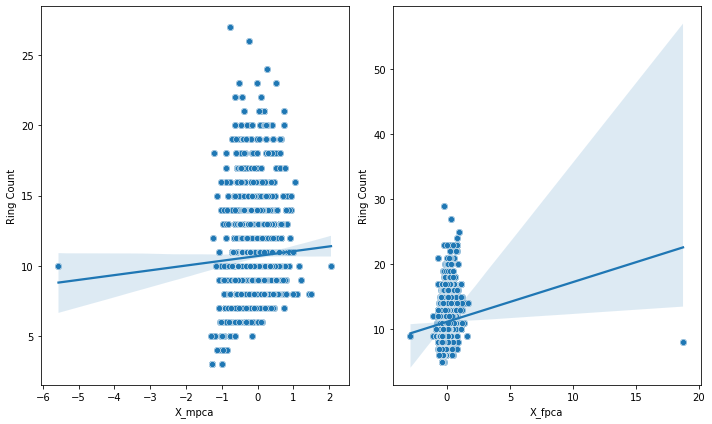

In [168]:
red_msp = pd.DataFrame(index = Aba_data_male.index, columns = ['X_mpca', 'Ring Count'])
red_msp['X_mpca'] = X_mpca
red_msp['Ring Count'] = Aba_data_male['Ring Count']

red_fsp = pd.DataFrame(index = Aba_data_female.index, columns = ['X_fpca', 'Ring Count'])
red_fsp['X_fpca'] = X_fpca
red_fsp['Ring Count'] = Aba_data_female['Ring Count']

fig, axs = plt.subplots(1, 2, figsize = (10, 6))

m_fit = sns.regplot(x = X_mreg['X_mpca'], y = Aba_data_male['Ring Count'], ax = axs[0])
f_fit = sns.regplot(x = X_freg['X_fpca'], y = Aba_data_female['Ring Count'], ax = axs[1])

sns.scatterplot(data = red_msp, x = 'X_mpca', y = 'Ring Count', ax = axs[0])
sns.scatterplot(data = red_fsp, x = 'X_fpca', y = 'Ring Count', ax = axs[1])

plt.tight_layout()
plt.show()

#### Quantifying Outlier Influence on Regression

#### Residual Analysis

#### Selecting Principal Components